In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from utils.config import cfg, cfg_from_file
cfg_from_file("config/aids3/emd_aids3.yml")

In [3]:
from dataset_loader import load_data

In [4]:
data, dict_col = load_data(cfg)


Dataset aids3 info:
Nb. col: 14
Nb unique t: 1503
Min t: 0.899999999999636
Max t: 1096.0
Nb of event: Counter({0: 2223, 1: 1762})


In [5]:
data.shape

(3985, 16)

In [7]:
import torch
import os
path = "/local_workspace/piepmike/Survival_Pytorch_EMD/results/aids3_emd_aids3_2022_03_21_14_32_02/LR0.001_L20.0001_PRIOR1.0/Models/model_epoch_bestsplit4.pth"
state_dict = torch.load(path, map_location=lambda storage, loc: storage)

In [8]:
X_train_shape = (-1, data.shape[1] - 2)

In [9]:
from models import MLP
from utils.config import cfg, cfg_from_file
from trainer.emd_trainer import EMDTrainer

In [10]:
cfg.CUDA = False
trainer = EMDTrainer(0)
trainer.model.load_state_dict(state_dict)
trainer.model.eval();

{'CONFIG_NAME': 'emd_aids3',
 'CUDA': False,
 'DATA': {'ADD_CENS': False,
          'DATASET': 'aids3',
          'DEATH_AT_CENSOR_TIME': False,
          'NO_CENSORED_DATA': False,
          'PATH': 'datasets/',
          'SPLITS': '[0, 1, 2, 3, 4]'},
 'EMD': {'PRIOR': [1.0]},
 'GPU_ID': '0',
 'TRAIN': {'BATCH_NORM': True,
           'BATCH_SIZE': 512,
           'DIV_TIME': 1,
           'DROP_HIDDEN': '[0.5, 0.5, 0.5]',
           'DROP_INPUT': 0.2,
           'L2_COEFF': ['1e-6', '1e-5', '1e-4', '1e-3', '1e-2'],
           'LAYER_SIZES': '[100, 100, 100]',
           'LOSS_TYPE': 'emd_loss',
           'LR': ['1e-4', '1e-3', '1e-2', '1e-1'],
           'MAX_EPOCH': 1000,
           'MODEL': 'emd',
           'PATIENCE': 20},
 'VERBOSE': False}

Dataset aids3 info:
Nb. col: 14
Nb unique t: 1503
Min t: 0.899999999999636
Max t: 1096.0
Nb of event: Counter({0: 2223, 1: 1762})


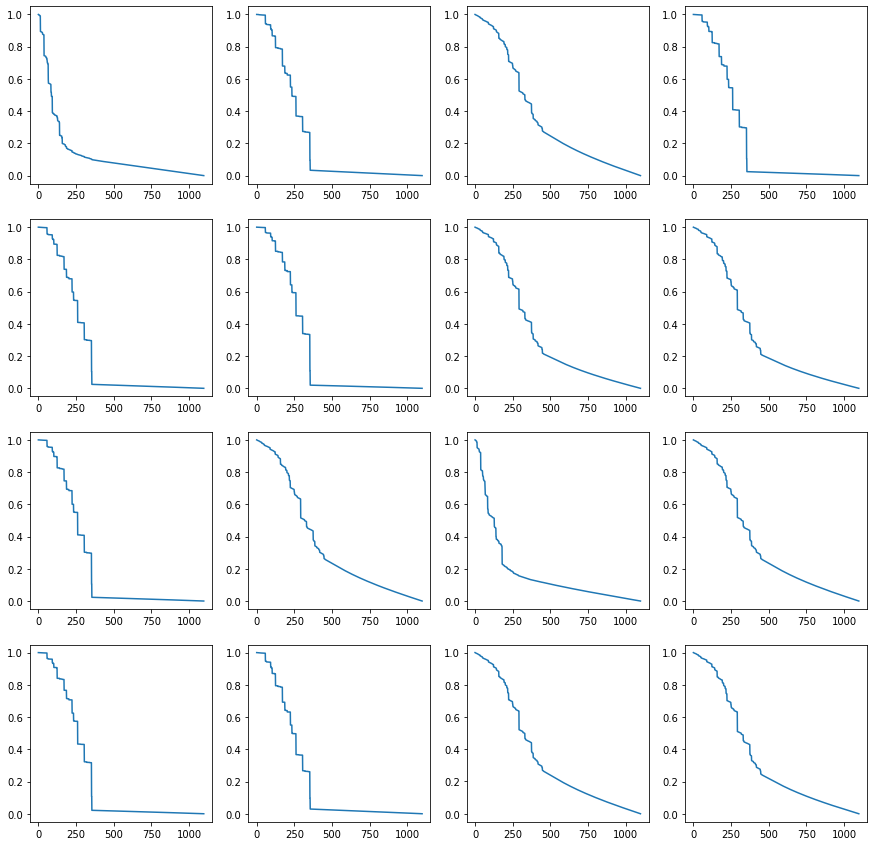

In [17]:
import numpy as np
fig, axs = plt.subplots(4,4, figsize=(15,15))
for i in range(16):
    idx = np.random.choice(len(data))
    x = data[idx:idx+1]
    cdfs = trainer.predict_batch(x)
    axs[i//4,i%4].plot(1-cdfs[0])

In [21]:
data[:,1]

array([1., 1., 1., ..., 0., 1., 1.], dtype=float32)

<AxesSubplot:xlabel='timeline'>

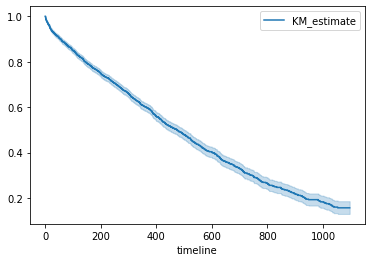

In [22]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data[:,0], data[:,1])
kmf.plot()

In [18]:
# idx = np.random.choice(len(data))
idx = 58243
x = data[idx:idx+1]
cdfs = trainer.predict_batch(x)
1-cdfs[0]

array([9.9852401e-01, 9.0660286e-01, 7.7250350e-01, 6.0848248e-01,
       4.1547197e-01, 2.4862587e-01, 1.2337631e-01, 4.1601360e-02,
       8.3814859e-03, 4.4639111e-03, 4.1093230e-03, 4.0128231e-03,
       3.9405823e-03, 3.7166476e-03, 3.3866763e-03, 3.0046701e-03,
       2.5935769e-03, 2.1690726e-03, 1.7383099e-03, 1.3040900e-03,
       8.6873770e-04, 4.3427944e-04, 5.9604645e-08], dtype=float32)

9


Text(0.5, 1.0, 'Death is < 6 months')

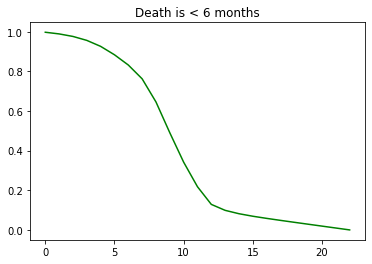

In [11]:
# Plot a curve where death is less than 6 months
fig, ax = plt.subplots()
for i in range(len(data)):
    if data[i][0] < 0.5:
        print(i)
        x = data[idx:idx+1]
        cdfs = trainer.predict_batch(x)
        ax.plot(1-cdfs[0], color='green')
        break
ax.set_title("Death is < 6 months")

1


Text(0.5, 1.0, 'Death is > 8 years')

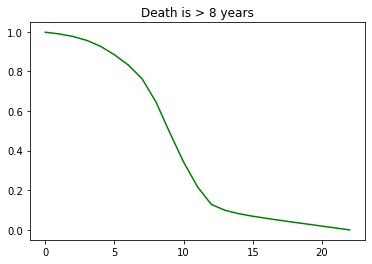

In [12]:
# Plot a curve where death is greater than 8 years
fig, ax = plt.subplots()
for i in range(len(data)):
    if data[i][0] > 8:
        print(i)
        x = data[idx:idx+1]
        cdfs = trainer.predict_batch(x)
        ax.plot(1-cdfs[0], color='green')
        break
ax.set_title("Death is > 8 years")

TypeError: vlines() missing 2 required positional arguments: 'ymin' and 'ymax'

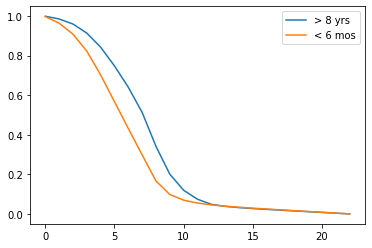

In [29]:
plt.plot(1-trainer.predict_batch(data[1:1+1])[0], label="> 8 yrs")
plt.plot(1-trainer.predict_batch(data[17:17+1])[0], label="< 6 mos")
plt.legend()

In [25]:
data[:2]

array([[ 4.920548  ,  1.        ,  0.7379026 ,  0.        , -0.4920641 ,
         0.        ,  1.4545192 , -0.24198824, -0.73253286,  0.0974685 ,
         1.2075492 ,  0.7458455 , -0.296945  , -0.04879543,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [17.353424  ,  0.        ,  0.04680848,  0.        , -0.4920641 ,
         0.        , -0.6895245 , -0.9514814 , -0.3729828 , -0.39373884,
        -2.8277342 , -0.46919617,  0.25708863,  0.22924726,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ]], dtype=float32)

1


Text(0.5, 1.0, 'No Event, Tgt4: 20.5')

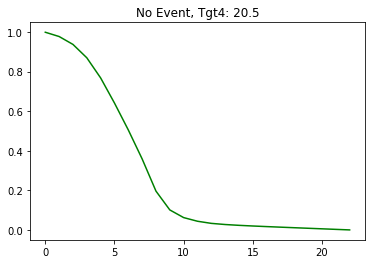

In [26]:
fig, ax = plt.subplots()
for i in range(len(data)):
    if data[i][0] > 8 and data[i][1]==0:
        print(i)
        x = data[idx:idx+1]
        cdfs = trainer.predict_batch(x)
        ax.plot(1-cdfs[0], color='green')
        break
ax.set_title("No Event, Tgt4: 20.5")

In [27]:
data[:6,:2]

array([[ 4.920548,  1.      ],
       [17.353424,  0.      ],
       [14.112329,  1.      ],
       [13.610959,  1.      ],
       [14.923287,  1.      ],
       [20.476713,  0.      ]], dtype=float32)

In [28]:
cdfs

array([[0.0015638 , 0.02318455, 0.06306661, 0.13053356, 0.23231965,
        0.35915053, 0.49507922, 0.6413744 , 0.80405504, 0.8990334 ,
        0.9377725 , 0.95619184, 0.9669149 , 0.97273487, 0.9768503 ,
        0.9802113 , 0.98321694, 0.9860856 , 0.9888922 , 0.9916726 ,
        0.99444944, 0.9972249 , 1.        ]], dtype=float32)